# Spatial Joins

Spatial joins are what make place-based exploration meaningful. Your project may like to investigate the relevance of the location of points of interest. Are hospitals, schools, police stations, fire stations all located in areas that can effectively serve its population? How many instances of crime are recorded by neighborhood? What census tracts have the highest counts of traffic incidents, and what are the characteristics of those tracts?

So how do spatial joins work? Unlike an attribute join, a "spatial join" joins two spatial datasets by where they are located relevant to each other. For example, if you have a point dataset that you want to join to a polygon dataset, you can spatially join them to produce a new layer that tells you which polygon each point fell inside of. Or vice versa! You can find out *how many* points fall inside each polygon.

In this lab, we want ask the question: Are there spatial correlations for different travel behaviors within different Los Angeles Neighborhoods?

To answer this question, we will look at two different datasets:

1. Census data with data for "Means of transportation to work"
2. Neighborhood boundaries from the Los Angeles Times

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx

## Census Tracts

Use [Census Reporter](https://censusreporter.org/) to grab census data at the tract level.

In [2]:
tracts = gpd.read_file('trans.geojson')

In [3]:
tracts.head()

,geoid,name,B08105A001,"B08105A001, Error",B08105A002,"B08105A002, Error",B08105A003,"B08105A003, Error",B08105A004,"B08105A004, Error",B08105A005,"B08105A005, Error",B08105A006,"B08105A006, Error",B08105A007,"B08105A007, Error",geometry
0,05000US06037,"Los Angeles County, CA",2481868.0,9861.0,1852703.0,8684.0,214006.0,3832.0,119542.0,2376.0,69536.0,1837.0,62391.0,1750.0,163690.0,3133.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1465.0,285.0,1216.0,265.0,108.0,57.0,23.0,29.0,0.0,12.0,20.0,30.0,98.0,53.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1656.0,234.0,1466.0,253.0,107.0,98.0,0.0,12.0,11.0,17.0,7.0,11.0,65.0,38.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2131.0,451.0,1785.0,365.0,166.0,145.0,50.0,52.0,33.0,37.0,47.0,53.0,50.0,62.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1063.0,185.0,836.0,165.0,111.0,66.0,18.0,20.0,0.0,12.0,23.0,35.0,75.0,51.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [4]:
# first row is the total for the county so drop it
tracts=tracts.drop([0])

In [5]:
# look at tracts data again
tracts.head()

,geoid,name,B08105A001,"B08105A001, Error",B08105A002,"B08105A002, Error",B08105A003,"B08105A003, Error",B08105A004,"B08105A004, Error",B08105A005,"B08105A005, Error",B08105A006,"B08105A006, Error",B08105A007,"B08105A007, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1465.0,285.0,1216.0,265.0,108.0,57.0,23.0,29.0,0.0,12.0,20.0,30.0,98.0,53.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1656.0,234.0,1466.0,253.0,107.0,98.0,0.0,12.0,11.0,17.0,7.0,11.0,65.0,38.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2131.0,451.0,1785.0,365.0,166.0,145.0,50.0,52.0,33.0,37.0,47.0,53.0,50.0,62.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1063.0,185.0,836.0,165.0,111.0,66.0,18.0,20.0,0.0,12.0,23.0,35.0,75.0,51.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1771.0,211.0,1382.0,176.0,134.0,103.0,86.0,100.0,0.0,12.0,0.0,12.0,169.0,88.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [6]:
tracts.shape

(2346, 17)

## Metadata
What is the metadata? When you download data from censusrepoter.com, it comes with a metadata.json file. You can open this with any text editor (even your browser) to see its contents.
- [metadata](metadata.json)

```
B08105A001: {
indent: 0,
name: "Total:"
},
B08105A002: {
indent: 1,
name: "Car, truck, or van - drove alone"
},
B08105A003: {
indent: 1,
name: "Car, truck, or van - carpooled"
},
B08105A004: {
indent: 1,
name: "Public transportation (excluding taxicab)"
},
B08105A005: {
indent: 1,
name: "Walked"
},
B08105A006: {
indent: 1,
name: "Taxicab, motorcycle, bicycle, or other means"
},
B08105A007: {
indent: 1,
name: "Worked at home"
}
```

In [7]:
# columns
tracts.columns.to_list()

['geoid',
 'name',
 'B08105A001',
 'B08105A001, Error',
 'B08105A002',
 'B08105A002, Error',
 'B08105A003',
 'B08105A003, Error',
 'B08105A004',
 'B08105A004, Error',
 'B08105A005',
 'B08105A005, Error',
 'B08105A006',
 'B08105A006, Error',
 'B08105A007',
 'B08105A007, Error',
 'geometry']

In [8]:
# rename to human readable column names
tracts.columns=['geoid',
 'name',
 'Total',
 'Total, Error',
 'Drove alone',
 'Drove alone, Error',
 'Carpooled',
 'Carpooled, Error',
 'Public transportation',
 'Public transportation, Error',
 'Walked',
 'Walked, Error',
 'Other',
 'Other, Error',
 'Worked from home',
 'Worked from home, Error',
 'geometry']

In [9]:
# get rid of the error columns
tracts = tracts[['geoid',
 'name',
 'Total',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Walked',
 'Other',
 'Worked from home',
 'geometry']]

In [10]:
tracts.sample(5)

,geoid,name,Total,Drove alone,Carpooled,Public transportation,Walked,Other,Worked from home,geometry
1584,14000US06037533107,"Census Tract 5331.07, Los Angeles, CA",985.0,657.0,153.0,81.0,30.0,60.0,4.0,"MULTIPOLYGON (((-118.22124 33.97690, -118.2206..."
1714,14000US06037543604,"Census Tract 5436.04, Los Angeles, CA",776.0,725.0,31.0,8.0,0.0,0.0,12.0,"MULTIPOLYGON (((-118.28888 33.80246, -118.2888..."
902,14000US06037272202,"Census Tract 2722.02, Los Angeles, CA",1339.0,991.0,111.0,85.0,6.0,32.0,114.0,"MULTIPOLYGON (((-118.44266 33.99580, -118.4418..."
2059,14000US06037650102,"Census Tract 6501.02, Los Angeles, CA",572.0,469.0,73.0,11.0,5.0,4.0,10.0,"MULTIPOLYGON (((-118.34187 33.87277, -118.3414..."
60,14000US06037107020,"Census Tract 1070.20, Los Angeles, CA",1557.0,1113.0,380.0,21.0,0.0,0.0,43.0,"MULTIPOLYGON (((-118.45881 34.29948, -118.4572..."


## Map plot

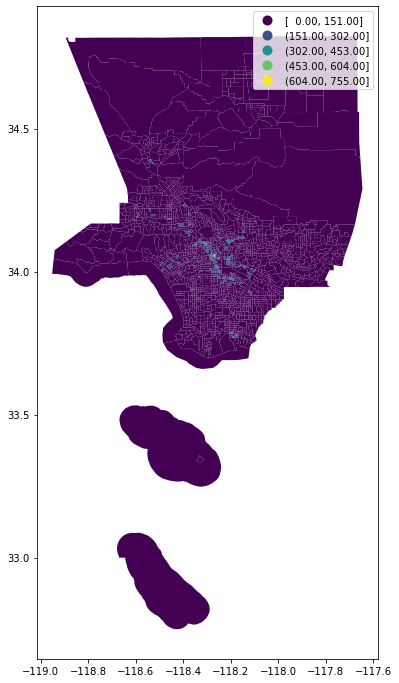

In [11]:
ax = tracts.plot(figsize=(12,12),
                 column='Public transportation',
                 legend=True,
                 scheme='equal_interval')

## Clean it up!
- add a basemap
- remove the axix
- add a title

In [12]:
# add a basemap with contextily

# 1. first reproject to web mercator
tracts_web_mercator = tracts.to_crs(epsg=3857)

In [1]:
ax = tracts_web_mercator.plot(figsize=(15,15),
                 column='Public transportation',
                 legend=True,
                 alpha=0.8,
#                  scheme='equal_interval'
                             )

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Public Transportation Users in Los Angeles')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

NameError: name 'tracts_web_mercator' is not defined

## Bubble map

### Using centroids

In [14]:
# how about centroids?
tracts_web_mercator['centroid'] = tracts_web_mercator['geometry'].centroid

In [15]:
tracts_web_mercator.head()

,geoid,name,Total,Drove alone,Carpooled,Public transportation,Walked,Other,Worked from home,geometry,centroid
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1465.0,1216.0,108.0,23.0,0.0,20.0,98.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13...",POINT (-13168315.068 4063696.445)
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1656.0,1466.0,107.0,0.0,11.0,7.0,65.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13...",POINT (-13167998.981 4064807.468)
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2131.0,1785.0,166.0,50.0,33.0,47.0,50.0,"MULTIPOLYGON (((-13169034.646 4063225.625, -13...",POINT (-13168063.937 4062820.838)
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1063.0,836.0,111.0,18.0,0.0,23.0,75.0,"MULTIPOLYGON (((-13167528.939 4062726.771, -13...",POINT (-13167051.133 4062637.132)
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1771.0,1382.0,134.0,86.0,0.0,0.0,169.0,"MULTIPOLYGON (((-13166671.668 4062511.964, -13...",POINT (-13165867.273 4062255.529)


In [16]:
# switch the geometry column from polygon to centroid
tracts_web_mercator = tracts_web_mercator.set_geometry('centroid')

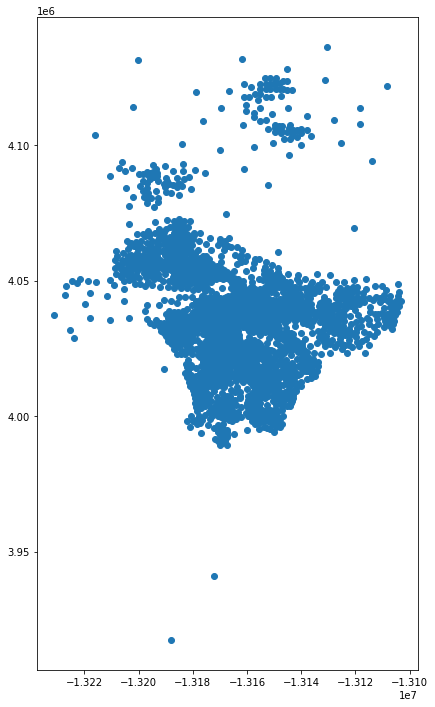

In [17]:
tracts_web_mercator.plot(figsize=(12,12))

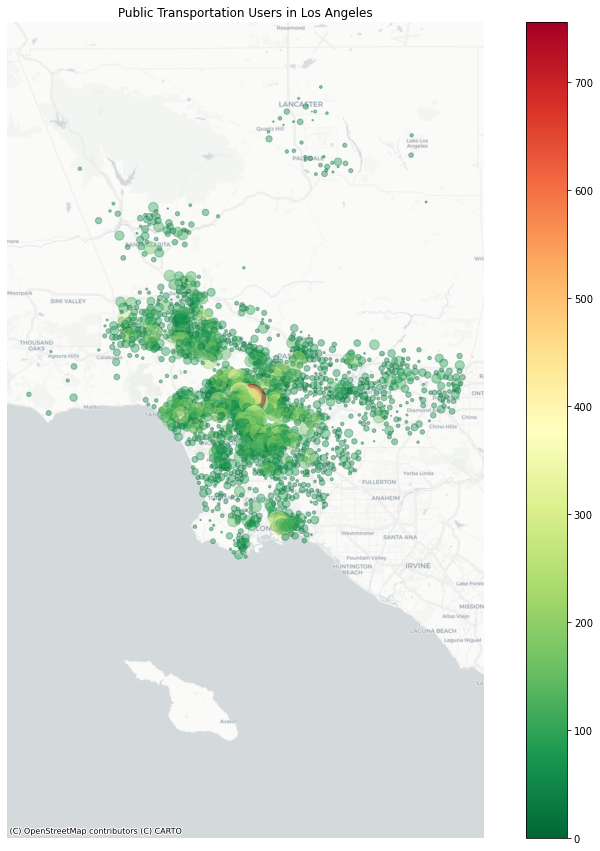

In [18]:
ax = tracts_web_mercator.plot(figsize=(15,15),
                 markersize='Public transportation',
                 column='Public transportation',
                 alpha=0.4, 
                 legend=True,
#                  categorical=True,
#                  scheme='quantiles',
                 cmap='RdYlGn_r',
#                  legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)}
                )
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Public Transportation Users in Los Angeles')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## LA Neighborhoods

Bring in Neighborhoods from the LA Times


In [19]:
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

What is the coordinate system?

In [20]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# reproject to Web Mercator
neighborhoods_web_mercator = neighborhoods.to_crs(epsg=3857)

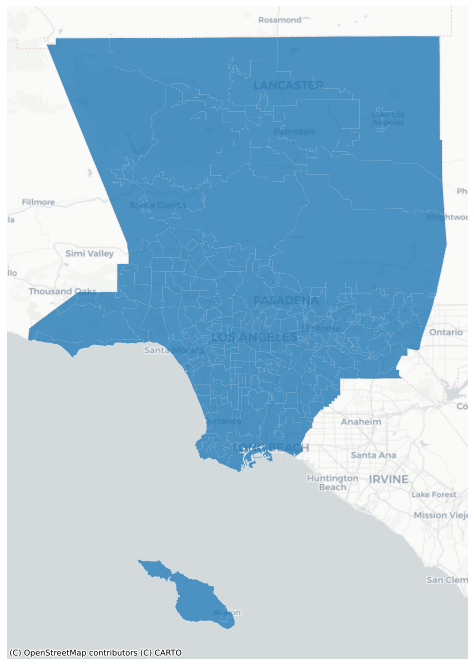

In [22]:
# map it
ax = neighborhoods_web_mercator.plot(figsize=(12,12),alpha=0.8)
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Unique neighborhoods

In [23]:
neighborhoods_web_mercator.name.unique()

array(['Acton', 'Adams-Normandie', 'Agoura Hills', 'Agua Dulce',
       'Alhambra', 'Alondra Park', 'Altadena', 'Angeles Crest', 'Arcadia',
       'Arleta', 'Arlington Heights', 'Artesia', 'Athens',
       'Atwater Village', 'Avalon', 'Avocado Heights', 'Azusa',
       'Baldwin Hills/Crenshaw', 'Baldwin Park', 'Bel-Air', 'Bellflower',
       'Bell Gardens', 'Bell', 'Beverly Crest', 'Beverly Grove',
       'Beverly Hills', 'Beverlywood', 'Boyle Heights', 'Bradbury',
       'Brentwood', 'Broadway-Manchester', 'Burbank', 'Calabasas',
       'Canoga Park', 'Carson', 'Carthay', 'Castaic Canyons', 'Castaic',
       'Central-Alameda', 'Century City', 'Cerritos', 'Charter Oak',
       'Chatsworth', 'Chatsworth Reservoir', 'Chesterfield Square',
       'Cheviot Hills', 'Chinatown', 'Citrus', 'Claremont', 'Commerce',
       'Compton', 'Covina', 'Cudahy', 'Culver City', 'Cypress Park',
       'Del Aire', 'Del Rey', 'Desert View Highlands', 'Diamond Bar',
       'Downey', 'Downtown', 'Duarte', 'Ea

## One neighborhood at a time

In [24]:
neighborhoods_web_mercator[neighborhoods_web_mercator.name=='Westwood']

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
264,L.A. County Neighborhood (V5),westwood,Westwood,westwood-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.6757772963, 'type': 'segment-of-a-c...",/1.0/boundary/westwood-la-county-neighborhood-v5/,"MULTIPOLYGON (((-13183557.499 4039456.131, -13..."


In [25]:
westwood = neighborhoods_web_mercator[neighborhoods_web_mercator.name=='Westwood']

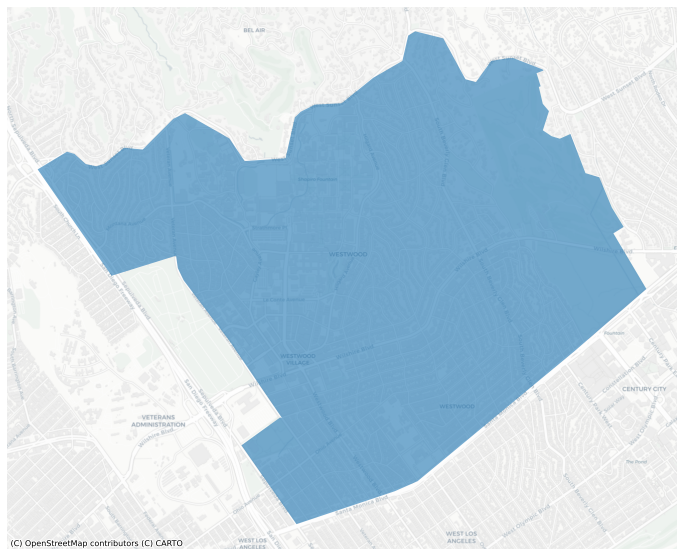

In [26]:
ax = westwood.plot(figsize=(12,12),alpha=0.6)
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Spatial join: find census tracts within a neighborhood

In [27]:
# find the census tracts that fall within 
tracts_in_neighborhood = gpd.sjoin(tracts_web_mercator, westwood, how="inner", op='intersects')

In [28]:
tracts_in_neighborhood.head()

,geoid,name_left,Total,Drove alone,Carpooled,Public transportation,Walked,Other,Worked from home,geometry,centroid,index_right,kind,external_id,name_right,slug,set,metadata,resource_uri
845,14000US06037265100,"Census Tract 2651, Los Angeles, CA",860.0,590.0,20.0,18.0,47.0,8.0,177.0,"MULTIPOLYGON (((-13184616.036 4039313.397, -13...",POINT (-13183439.231 4038704.516),264,L.A. County Neighborhood (V5),westwood,Westwood,westwood-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.6757772963, 'type': 'segment-of-a-c...",/1.0/boundary/westwood-la-county-neighborhood-v5/
846,14000US06037265201,"Census Tract 2652.01, Los Angeles, CA",745.0,416.0,36.0,38.0,121.0,29.0,105.0,"MULTIPOLYGON (((-13184774.666 4037508.152, -13...",POINT (-13184280.761 4037778.875),264,L.A. County Neighborhood (V5),westwood,Westwood,westwood-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.6757772963, 'type': 'segment-of-a-c...",/1.0/boundary/westwood-la-county-neighborhood-v5/
847,14000US06037265202,"Census Tract 2652.02, Los Angeles, CA",979.0,688.0,33.0,0.0,176.0,0.0,82.0,"MULTIPOLYGON (((-13185595.870 4037350.393, -13...",POINT (-13184812.124 4037116.732),264,L.A. County Neighborhood (V5),westwood,Westwood,westwood-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.6757772963, 'type': 'segment-of-a-c...",/1.0/boundary/westwood-la-county-neighborhood-v5/
848,14000US06037265301,"Census Tract 2653.01, Los Angeles, CA",1194.0,112.0,8.0,76.0,892.0,34.0,72.0,"MULTIPOLYGON (((-13186404.940 4038991.381, -13...",POINT (-13185285.437 4038348.853),264,L.A. County Neighborhood (V5),westwood,Westwood,westwood-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.6757772963, 'type': 'segment-of-a-c...",/1.0/boundary/westwood-la-county-neighborhood-v5/
849,14000US06037265303,"Census Tract 2653.03, Los Angeles, CA",1023.0,351.0,19.0,70.0,450.0,50.0,83.0,"MULTIPOLYGON (((-13186349.837 4038248.063, -13...",POINT (-13186173.361 4037838.876),264,L.A. County Neighborhood (V5),westwood,Westwood,westwood-la-county-neighborhood-v5,/1.0/boundary-set/la-county-neighborhoods-v5/,"{'sqmi': 3.6757772963, 'type': 'segment-of-a-c...",/1.0/boundary/westwood-la-county-neighborhood-v5/


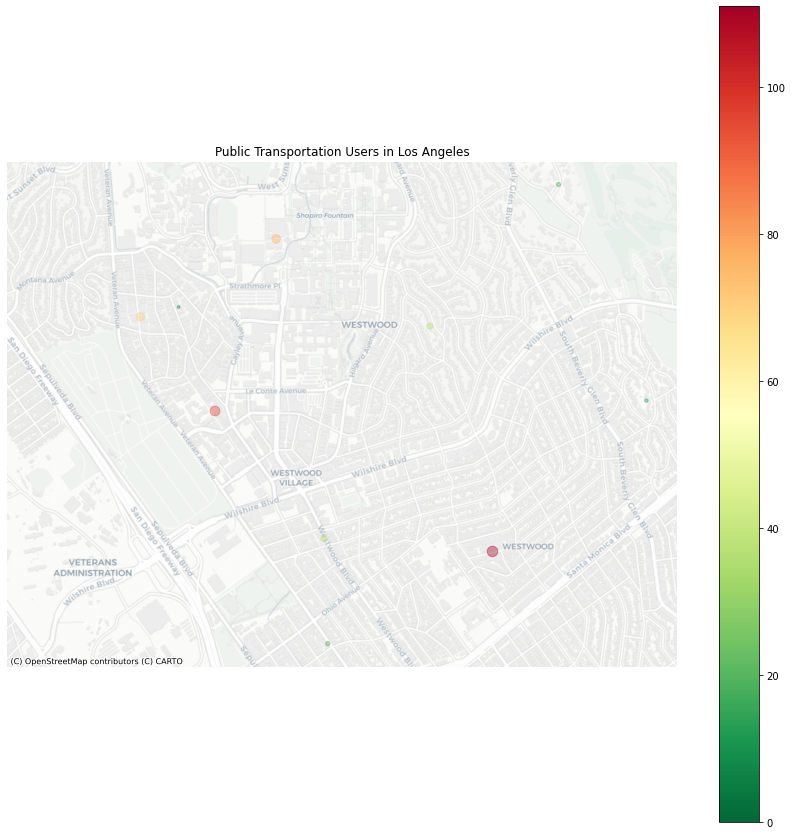

In [29]:
ax = tracts_in_neighborhood.plot(figsize=(15,15),
                 markersize='Public transportation',
                 column='Public transportation',
                 alpha=0.4, 
                 legend=True,
#                  categorical=True,
#                  scheme='quantiles',
                 cmap='RdYlGn_r',
#                  legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)}
                )
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Public Transportation Users in Los Angeles')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [30]:
# put the geometry back to polygon
tracts_in_neighborhood = tracts_in_neighborhood.set_geometry('geometry')

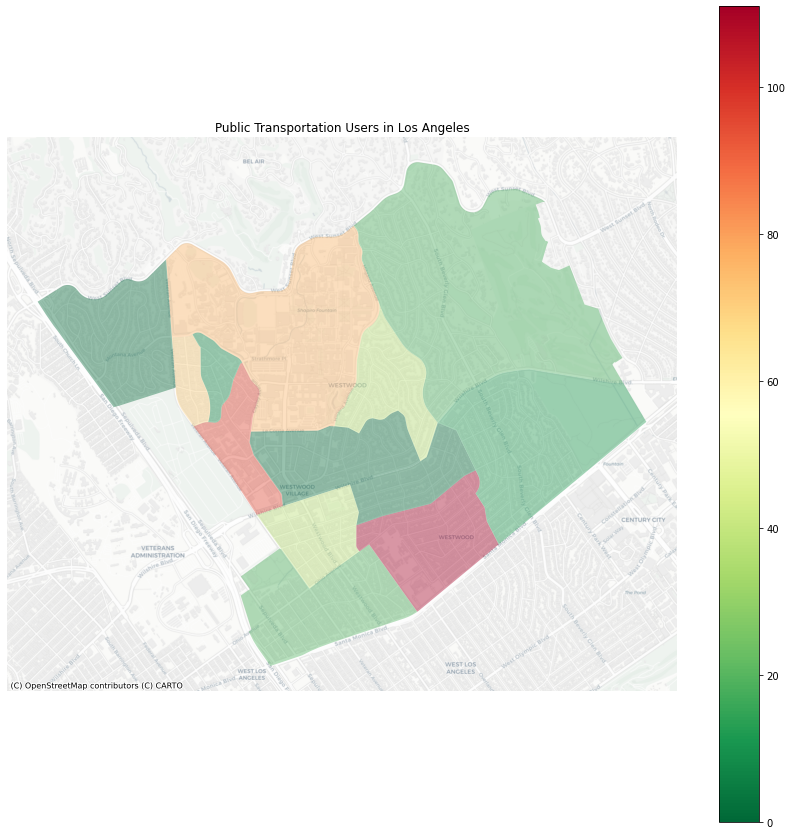

In [31]:
ax = tracts_in_neighborhood.plot(figsize=(15,15),
                 markersize='Public transportation',
                 column='Public transportation',
                 alpha=0.4, 
                 legend=True,
                 cmap='RdYlGn_r'
                )
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Public Transportation Users in Los Angeles')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

## Create a function

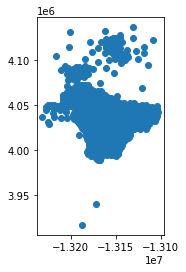

In [43]:
tracts_web_mercator.plot()

In [48]:
# create a function
def neighborhood_tracts(name='Westwood'):
    # subset neighborhoods by name
    neighborhood = neighborhoods_web_mercator[neighborhoods_web_mercator.name==name]
    
    # spatial join to get tracts within the neighborhood
    tracts_in_neighborhood = gpd.sjoin(tracts_web_mercator,neighborhood, how="inner", op='intersects')
    
    # switch the geometry column from polygon to centroid
    tracts_in_neighborhood = tracts_in_neighborhood.set_geometry('geometry')

    ax = tracts_in_neighborhood.plot(figsize=(15,15),
                     markersize='Public transportation',
                     column='Public transportation',
                     alpha=0.4, 
                     legend=True,
                     cmap='RdYlGn_r'
                    )
    # remove the axis
    ax.axis('off')

    # add a title
    ax.set_title('Public Transportation Users in '+name)

    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

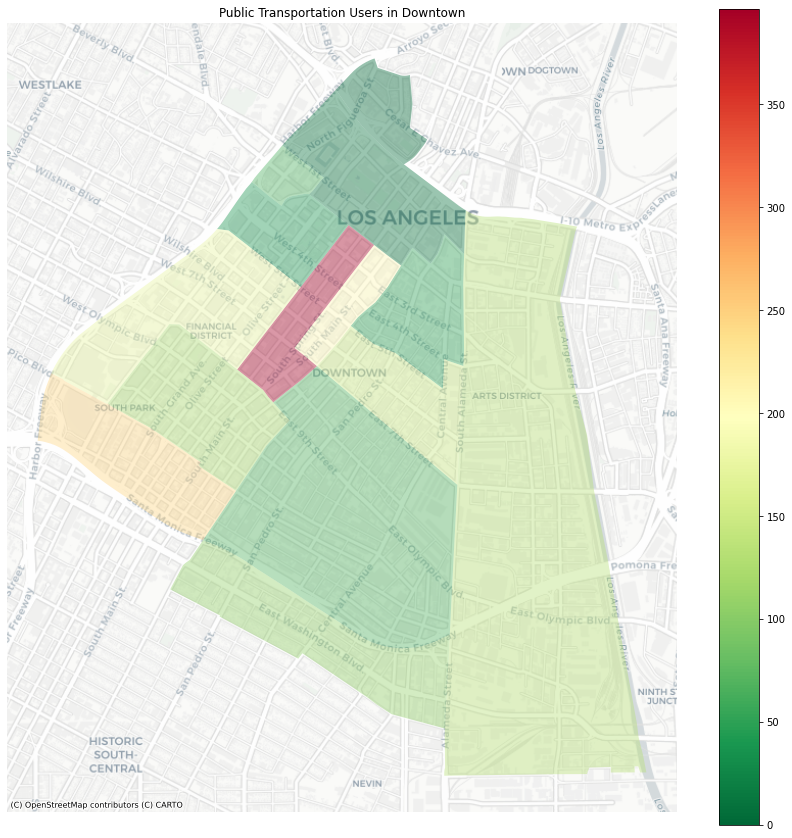

In [49]:
downtown = neighborhood_tracts('Downtown')
downtown

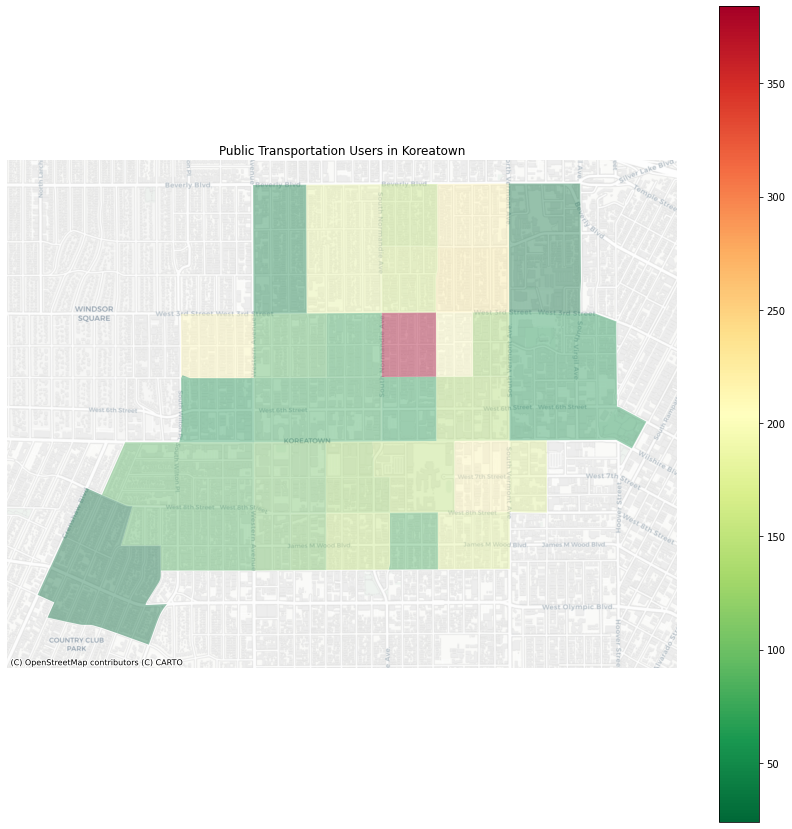

In [52]:
santa_monica = neighborhood_tracts('Koreatown')